In [1]:
#Visualisiations for UBS's Prices & Earnings data set
#https://www.ubs.com/microsites/prices-earnings/prices-earnings.html 
import numpy as np
import pandas as pd
from pandas import DataFrame,Series
from numpy.random import randn
# Stats import
from scipy import stats
# Plotting
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

In [2]:
## Add to dataset : 
#Distance to montpellier and Grossbottwar in hours by train and hours by car.
#Population city and area

df_ubs = pd.read_excel('ubs-prices-and-earnings-opendata.xlsx',parse_cols=4
                       ,names=['Year','City','MainSection','SubSection','Value']
                      ,convert_floats=False)

In [3]:
df_dpp = df_ubs[(df_ubs.MainSection == 'General: Domestic Purchasing Power') 
                & (df_ubs.SubSection == 'Net, hourly (New York = 100)') 
                & (df_ubs.City.isin(['London','Berlin','Zurich','Geneva','Luxembourg','Paris','Munich']))
                &(df_ubs.Year == 2015)].pivot(index='City',columns='MainSection',values='Value')
df_earnnet = df_ubs[(df_ubs.MainSection == 'Earnings: Average hourly (net)') 
                & (df_ubs.SubSection == '(USD)') 
                & (df_ubs.City.isin(['London','Berlin','Zurich','Geneva','Luxembourg','Paris','Munich']))
                & (df_ubs.Year == 2015)].pivot(index='City',columns='MainSection',values='Value')
df_housing = df_ubs[(df_ubs.MainSection == 'Prices: Housing') 
                & (df_ubs.SubSection == 'Unfurnished 3-room Apartment, medium (USD)') 
                & (df_ubs.City.isin(['London','Berlin','Zurich','Geneva','Luxembourg','Paris','Munich']))
                & (df_ubs.Year == 2015)].pivot(index='City',columns='MainSection',values='Value')
df_iphone = df_ubs[(df_ubs.MainSection == 'General: Working time req to buy') 
                & (df_ubs.SubSection == 'iPhone 6 16GB, net (hours)') 
                & (df_ubs.City.isin(['London','Berlin','Zurich','Geneva','Luxembourg','Paris','Munich']))
                & (df_ubs.Year == 2015)].pivot(index='City',columns='MainSection',values='Value')

In [4]:
df_dpp_earnnet = pd.concat([df_dpp,df_earnnet],axis=1,join='inner').reset_index()
df_housing_earnnet = pd.concat([df_housing,df_earnnet],axis=1,join='inner').reset_index()
df_comb = pd.concat([df_dpp,df_housing,df_earnnet],axis=1,join='inner').reset_index()

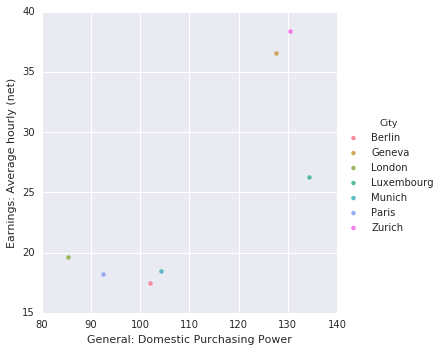

In [5]:
sns.lmplot('General: Domestic Purchasing Power','Earnings: Average hourly (net)',data= df_comb,fit_reg =False,hue='City',)


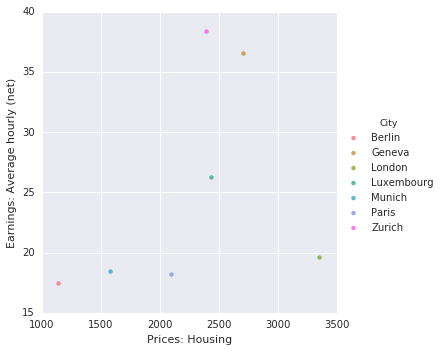

In [6]:
sns.lmplot('Prices: Housing','Earnings: Average hourly (net)',data= df_comb,fit_reg =False,hue='City')

In [7]:
df_housing_earnnet['Working time req to rent 3-room']=(df_housing_earnnet['Prices: Housing']/df_housing_earnnet['Earnings: Average hourly (net)'])

In [8]:
df_housing_earnnet.sort_values(by='Working time req to rent 3-room',inplace=True)
# sorting before plotting
df_housing_earnnet.head()

MainSection,City,Prices: Housing,Earnings: Average hourly (net),Working time req to rent 3-room
6,Zurich,2390,38.4,62.2396
0,Berlin,1140,17.5,65.1429
1,Geneva,2700,36.6,73.7705
4,Munich,1580,18.5,85.4054
3,Luxembourg,2430,26.3,92.3954


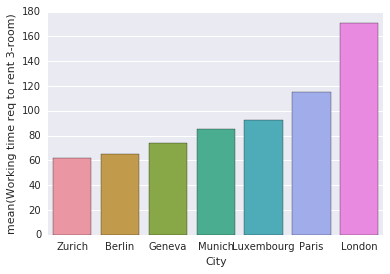

In [9]:
sns.barplot(x='City',y='Working time req to rent 3-room',data= df_housing_earnnet,)


In [10]:
df_iphone = df_iphone.reset_index()

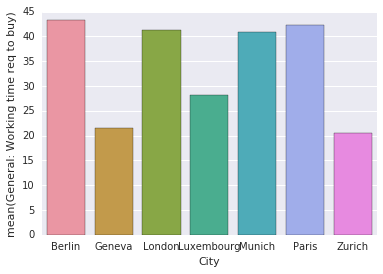

In [11]:
sns.barplot(x='City',y='General: Working time req to buy',data=df_iphone)